#  **GCN on CORA with Saliency-Based Graph Pruning**

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
import torch

if torch.cuda.is_available():

    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    # Code to run when CUDA is not available (for CPU)
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


## **Installing Dependencies**

In [3]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [4]:
!pip install numpy==1.23.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [5]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5890, done.
remote: Counting objects: 100% (1602/1602), done.
remote: Compressing objects: 100% (682/682), done.
remote: Total 5890 (delta 999), reused 1484 (delta 903), pack-reused 4288 (from 1)
Receiving objects: 100% (5890/5890), 12.10 MiB | 8.53 MiB/s, done.
Resolving deltas: 100% (3862/3862), done.
/content/DeepRobust
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/pytho

In [6]:
import random


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
!pip install --upgrade scipy networkx

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enf

In [9]:
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install --verbose --no-cache-dir torch-spline-conv (optional)

Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3

KeyboardInterrupt: 

In [10]:
!pip install deeprobust


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enf

In [11]:
!pip install torch-geometric


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enf

In [18]:
pip install deeprobust


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 5.3 MB/s eta 0:00:00


In [9]:
%cd /content
!pip install gensim
# Import necessary modules
from deeprobust.graph.defense import GCN
from deeprobust.graph.data import Dataset
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

/content
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


##  **2. Dataset — CORA**

In [2]:
# Load the Cora dataset
print("\n=== Loading Cora Dataset ===")
data = Dataset(root='/tmp/', name='cora', seed=15)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test


=== Loading Cora Dataset ===
Loading cora dataset...
Done!
Selecting 1 largest connected components


In [3]:
# Print dataset statistics
print("\n=== Cora Dataset Statistics ===")
print(f"Number of nodes: {adj.shape[0]}")
print(f"Number of edges: {adj.nnz // 2}")  # Divide by 2 for undirected graph
print(f"Number of features per node: {features.shape[1]}")
print(f"Number of classes: {labels.max() + 1}")  # Labels are 0-indexed
print(f"\nClass distribution:")
unique_classes, class_counts = np.unique(labels, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"  Class {cls}: {count} nodes ({count/len(labels)*100:.1f}%)")

print(f"\nTraining set size: {len(idx_train)} nodes ({len(idx_train)/len(labels)*100:.1f}%)")
print(f"Validation set size: {len(idx_val)} nodes ({len(idx_val)/len(labels)*100:.1f}%)")
print(f"Test set size: {len(idx_test)} nodes ({len(idx_test)/len(labels)*100:.1f}%)")


=== Cora Dataset Statistics ===
Number of nodes: 2485
Number of edges: 5069
Number of features per node: 1433
Number of classes: 7

Class distribution:
  Class 0: 285 nodes (11.5%)
  Class 1: 406 nodes (16.3%)
  Class 2: 726 nodes (29.2%)
  Class 3: 379 nodes (15.3%)
  Class 4: 214 nodes (8.6%)
  Class 5: 131 nodes (5.3%)
  Class 6: 344 nodes (13.8%)

Training set size: 247 nodes (9.9%)
Validation set size: 249 nodes (10.0%)
Test set size: 1988 nodes (80.0%)


In [4]:
# Calculate node degrees
degrees = np.array(adj.sum(axis=1)).flatten()
print(f"\nNode degree statistics:")
print(f"  Average degree: {degrees.mean():.2f}")
print(f"  Minimum degree: {degrees.min()}")
print(f"  Maximum degree: {degrees.max()}")
print(f"  Median degree: {np.median(degrees)}")


Node degree statistics:
  Average degree: 4.08
  Minimum degree: 1.0
  Maximum degree: 168.0
  Median degree: 3.0


In [5]:
# Check graph connectivity
print(f"\nGraph density: {adj.nnz / (adj.shape[0] * adj.shape[1]) * 100:.4f}%")
print(f"Is graph symmetric (undirected): {np.allclose(adj.todense(), adj.todense().T)}")

# Feature matrix statistics
print(f"\nFeature matrix statistics:")
print(f"  Shape: {features.shape}")
print(f"  Density: {features.nnz / (features.shape[0] * features.shape[1]) * 100:.2f}%")
print(f"  Number of non-zero entries: {features.nnz}")
print(f"  Average non-zero features per node: {features.nnz / features.shape[0]:.2f}")


Graph density: 0.1642%
Is graph symmetric (undirected): True

Feature matrix statistics:
  Shape: (2485, 1433)
  Density: 1.28%
  Number of non-zero entries: 45487
  Average non-zero features per node: 18.30


In [6]:
# Print sample data
print("\n=== Sample Data ===")
print(f"Sample adjacency row (node 0): {adj[0].toarray().flatten()[:10]}...")
print(f"Sample features (node 0): {features[0].toarray().flatten()[:10]}...")
print(f"Sample label (node 0): {labels[0]}")


=== Sample Data ===
Sample adjacency row (node 0): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Sample features (node 0): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Sample label (node 0): 5


In [7]:
import warnings
warnings.filterwarnings('ignore')

##  **Data Preprocessing**

In [12]:
# Convert to dense tensors
features = torch.FloatTensor(features.todense()).to(device)
labels = torch.LongTensor(labels).to(device)
adj_dense = torch.FloatTensor(adj.todense()).to(device)

# Convert indices to torch tensors
idx_train_torch = torch.LongTensor(idx_train).to(device)
idx_val_torch = torch.LongTensor(idx_val).to(device)
idx_test_torch = torch.LongTensor(idx_test).to(device)


##  **Gradient-Based Pruning**

##  **Utility Functions**

In [13]:
# accuracy function
def compute_accuracy(output, labels, indices=None):
    """Compute accuracy properly"""
    if indices is not None:
        if isinstance(indices, np.ndarray):
            indices = torch.LongTensor(indices).to(output.device)
        output = output[indices]
        labels = labels[indices]

    preds = output.max(1)[1]
    correct = preds.eq(labels).float().sum()
    return (correct / len(labels)).item()

# Create and train GCN with proper validation
def create_and_train_gcn_proper(adj_matrix, features, labels, idx_train, idx_val, idx_test,
                                model_name="GCN", epochs=200, lr=0.01, weight_decay=5e-4):
    print(f"\n=== Training {model_name} ===")

    # Create model
    model = GCN(nfeat=features.shape[1],
                nhid=16,
                nclass=labels.max().item() + 1,
                dropout=0.5,
                lr=lr,
                weight_decay=weight_decay,
                device=device)
    model = model.to(device)

    # Extract the PyTorch model from DeepRobust's wrapper
    # In DeepRobust, the GCN class IS the PyTorch model
    pytorch_model = model

    # Create optimizer
    optimizer = torch.optim.Adam(pytorch_model.parameters(),
                                 lr=lr,
                                 weight_decay=weight_decay)

    # Early stopping
    best_val_acc = 0
    best_model_state = None
    patience = 50
    patience_counter = 0

    train_losses = []
    val_accs = []

    for epoch in range(epochs):
        pytorch_model.train()
        optimizer.zero_grad()

        # Forward pass
        output = pytorch_model(features, adj_matrix)

        # Training loss
        loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])

        # Backward pass
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        pytorch_model.eval()
        with torch.no_grad():
            val_output = pytorch_model(features, adj_matrix)
            val_acc = compute_accuracy(val_output, labels, idx_val)
            val_accs.append(val_acc)

            # Early stopping
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = pytorch_model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        if epoch % 50 == 0:
            train_acc = compute_accuracy(output, labels, idx_train)
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | "
                  f"Train: {train_acc:.4f} | Val: {val_acc:.4f}")

    # Load best model
    if best_model_state:
        pytorch_model.load_state_dict(best_model_state)

    # Final evaluation
    pytorch_model.eval()
    with torch.no_grad():
        final_output = pytorch_model(features, adj_matrix)
        acc_train = compute_accuracy(final_output, labels, idx_train)
        acc_val = compute_accuracy(final_output, labels, idx_val)
        acc_test = compute_accuracy(final_output, labels, idx_test)

    print(f"Final - Train: {acc_train:.4f}, Val: {acc_val:.4f}, Test: {acc_test:.4f}")

    return pytorch_model, final_output, {'train': acc_train, 'val': acc_val, 'test': acc_test}

In [14]:
def compute_edge_saliency_simple(model, features, adj, labels, idx_train):
    """Simple saliency computation - avoid complex masking"""
    model.eval()

    # Create a copy of adjacency that requires gradient
    adj_with_grad = adj.clone().detach().requires_grad_(True)

    # Forward pass
    output = model(features, adj_with_grad)

    # Loss on training nodes only
    loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])

    # Compute gradients
    loss.backward()

    # Get saliency scores (absolute gradient values)
    if adj_with_grad.grad is not None:
        saliency = torch.abs(adj_with_grad.grad)

        # Zero out diagonal (self-loops)
        saliency = saliency * (1 - torch.eye(adj.shape[0], device=device))
    else:
        # Fallback: use random values
        saliency = torch.rand_like(adj)

    # Clean up
    adj_with_grad.grad = None

    return saliency.cpu().detach().numpy()

#  Compute node-level saliency
def compute_node_saliency(model, features, adj, labels, idx_train):
    """Compute saliency for nodes, then propagate to edges"""
    model.eval()

    # Node features require gradient
    features_with_grad = features.clone().detach().requires_grad_(True)

    # Forward pass
    output = model(features_with_grad, adj)

    # Loss on training nodes
    loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])

    # Compute gradients w.r.t features
    loss.backward()

    # Get node saliency (norm of gradient for each node)
    if features_with_grad.grad is not None:
        node_saliency = torch.norm(features_with_grad.grad, dim=1)
    else:
        node_saliency = torch.ones(features.shape[0], device=device)

    # Convert to edge saliency: average of connected nodes
    adj_np = adj.cpu().numpy()
    edge_indices = np.where(adj_np > 0)

    edge_saliency = np.zeros_like(adj_np)
    node_saliency_np = node_saliency.cpu().numpy()

    for i, j in zip(edge_indices[0], edge_indices[1]):
        edge_saliency[i, j] = (node_saliency_np[i] + node_saliency_np[j]) / 2

    return edge_saliency

In [15]:
# Pruning function
def prune_edges_by_saliency(adj_matrix, saliency_matrix, prune_ratio=0.3):
    """Prune edges based on saliency scores"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    # Get edges and their saliency scores
    edge_indices = np.where(adj_np > 0)
    edge_saliencies = saliency_matrix[edge_indices]

    # Sort edges by saliency (ascending - prune least important first)
    sorted_indices = np.argsort(edge_saliencies)

    # Calculate number of edges to prune
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    # Get indices of edges to prune (lowest saliency)
    prune_indices = sorted_indices[:n_prune]

    # Prune edges
    rows_to_prune = edge_indices[0][prune_indices]
    cols_to_prune = edge_indices[1][prune_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0  # Undirected graph

    print(f"Original edges: {n_edges}")
    print(f"Pruned edges: {n_prune} ({prune_ratio*100:.1f}%)")
    print(f"Remaining edges: {n_edges - n_prune}")

    # Check for isolated nodes
    node_degrees = adj_pruned.sum(axis=1)
    isolated_nodes = np.where(node_degrees == 0)[0]
    if len(isolated_nodes) > 0:
        print(f"Warning: {len(isolated_nodes)} isolated nodes created")

    return torch.FloatTensor(adj_pruned).to(device), prune_ratio

##  **Training the baseline GCN Model**

In [16]:
# MAIN EXPERIMENT
print("\n" + "="*60)
print("SALIENCY-BASED PRUNING EXPERIMENT")
print("="*60)

# 1. Train original model
print("\n1. Training Original Model...")
original_model, original_output, original_acc = create_and_train_gcn_proper(
    adj_dense, features, labels, idx_train, idx_val, idx_test,
    "Original GCN", epochs=200, lr=0.01, weight_decay=5e-4
)

print(f"\nOriginal Model Results:")
print(f"  Train Accuracy: {original_acc['train']:.4f}")
print(f"  Validation Accuracy: {original_acc['val']:.4f}")
print(f"  Test Accuracy: {original_acc['test']:.4f}")
print(f"  Train-Test Gap: {original_acc['train'] - original_acc['test']:.4f}")


SALIENCY-BASED PRUNING EXPERIMENT

1. Training Original Model...

=== Training Original GCN ===
Epoch   0 | Loss: 11.9760 | Train: 0.1053 | Val: 0.2289
Epoch  50 | Loss: 0.3703 | Train: 0.8704 | Val: 0.7952
Epoch 100 | Loss: 0.2167 | Train: 0.9190 | Val: 0.7992
Early stopping at epoch 124
Final - Train: 0.9960, Val: 0.7871, Test: 0.7676

Original Model Results:
  Train Accuracy: 0.9960
  Validation Accuracy: 0.7871
  Test Accuracy: 0.7676
  Train-Test Gap: 0.2283


##  **Computing Saliency**

In [17]:
# 2. Compute saliency (using simple method)
print("\n2. Computing Edge Saliency...")
print("Using simple gradient-based saliency...")
saliency_matrix = compute_edge_saliency_simple(original_model, features, adj_dense, labels, idx_train)

# Analyze saliency distribution
edge_saliencies = saliency_matrix[adj_dense.cpu().numpy() > 0]
print(f"\nSaliency Statistics:")
print(f"  Min: {edge_saliencies.min():.6f}")
print(f"  Max: {edge_saliencies.max():.6f}")
print(f"  Mean: {edge_saliencies.mean():.6f}")
print(f"  Median: {np.median(edge_saliencies):.6f}")
print(f"  Std: {edge_saliencies.std():.6f}")


2. Computing Edge Saliency...
Using simple gradient-based saliency...

Saliency Statistics:
  Min: 0.000000
  Max: 0.005652
  Mean: 0.000021
  Median: 0.000000
  Std: 0.000162


##  **Tests:**

In [18]:
# 3. Test different pruning ratios
print("\n3. Testing Different Pruning Ratios...")
prune_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for ratio in prune_ratios:
    print(f"\n{'='*50}")
    print(f"Testing {ratio*100:.0f}% Pruning")
    print('='*50)

    # Prune edges
    adj_pruned, actual_ratio = prune_edges_by_saliency(adj_dense, saliency_matrix, prune_ratio=ratio)

    # Train on pruned graph
    model_name = f"Pruned ({ratio*100:.0f}%)"
    pruned_model, pruned_output, pruned_acc = create_and_train_gcn_proper(
        adj_pruned, features, labels, idx_train, idx_val, idx_test,
        model_name, epochs=200, lr=0.01, weight_decay=5e-4
    )

    results.append({
        'target_ratio': ratio,
        'actual_ratio': actual_ratio,
        'accuracies': pruned_acc,
        'adj_pruned': adj_pruned
    })


3. Testing Different Pruning Ratios...

Testing 10% Pruning
Original edges: 10138
Pruned edges: 1013 (10.0%)
Remaining edges: 9125

=== Training Pruned (10%) ===
Epoch   0 | Loss: 9.0700 | Train: 0.0972 | Val: 0.2169
Epoch  50 | Loss: 0.4601 | Train: 0.8462 | Val: 0.7108
Epoch 100 | Loss: 0.3534 | Train: 0.8583 | Val: 0.7309
Early stopping at epoch 126
Final - Train: 0.9919, Val: 0.7229, Test: 0.6700

Testing 20% Pruning
Original edges: 10138
Pruned edges: 2027 (20.0%)
Remaining edges: 8111

=== Training Pruned (20%) ===
Epoch   0 | Loss: 11.1786 | Train: 0.1053 | Val: 0.1526
Epoch  50 | Loss: 0.4955 | Train: 0.8219 | Val: 0.6145
Epoch 100 | Loss: 0.3611 | Train: 0.8826 | Val: 0.6265
Early stopping at epoch 125
Final - Train: 0.9798, Val: 0.6225, Test: 0.6162

Testing 30% Pruning
Original edges: 10138
Pruned edges: 3041 (30.0%)
Remaining edges: 7097

=== Training Pruned (30%) ===
Epoch   0 | Loss: 7.6847 | Train: 0.1093 | Val: 0.1245
Epoch  50 | Loss: 0.4424 | Train: 0.8502 | Val: 0.4

##  **Visualization**


VISUALIZING RESULTS


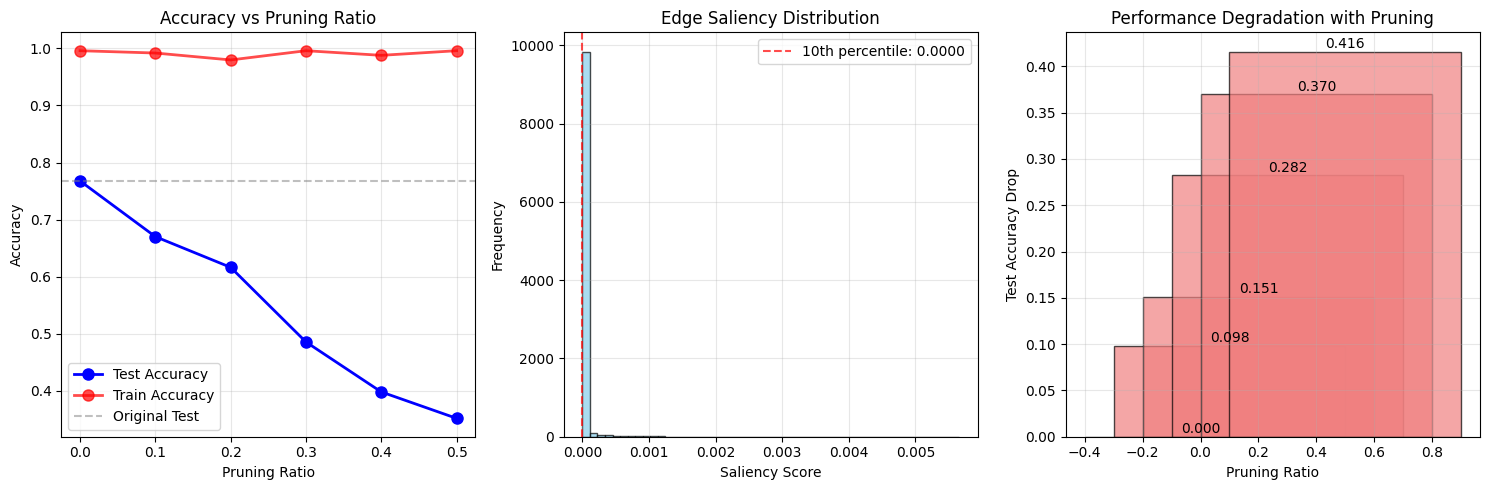

In [19]:
# 4. Visualize results
print("\n" + "="*60)
print("VISUALIZING RESULTS")
print("="*60)

plt.figure(figsize=(15, 5))

# Plot 1: Accuracy vs Pruning Ratio
plt.subplot(1, 3, 1)
target_ratios = [0.0] + [r['target_ratio'] for r in results]
test_accs = [original_acc['test']] + [r['accuracies']['test'] for r in results]
train_accs = [original_acc['train']] + [r['accuracies']['train'] for r in results]

plt.plot(target_ratios, test_accs, 'bo-', linewidth=2, markersize=8, label='Test Accuracy')
plt.plot(target_ratios, train_accs, 'ro-', linewidth=2, markersize=8, label='Train Accuracy', alpha=0.7)
plt.axhline(y=original_acc['test'], color='gray', linestyle='--', alpha=0.5, label='Original Test')

plt.xlabel('Pruning Ratio')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Pruning Ratio')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Saliency distribution
plt.subplot(1, 3, 2)
plt.hist(edge_saliencies, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Saliency Score')
plt.ylabel('Frequency')
plt.title('Edge Saliency Distribution')
plt.grid(alpha=0.3)

# Add vertical line at 10th percentile
percentile_10 = np.percentile(edge_saliencies, 10)
plt.axvline(x=percentile_10, color='red', linestyle='--', alpha=0.7,
            label=f'10th percentile: {percentile_10:.4f}')
plt.legend()

# Plot 3: Performance drop vs pruning
plt.subplot(1, 3, 3)
performance_drops = [0.0] + [original_acc['test'] - r['accuracies']['test'] for r in results]

bars = plt.bar(target_ratios, performance_drops, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Pruning Ratio')
plt.ylabel('Test Accuracy Drop')
plt.title('Performance Degradation with Pruning')

# Add value labels
for bar, drop in zip(bars, performance_drops):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{drop:.3f}', ha='center', va='bottom')

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

##  **summary**

In [20]:
# 5. Summary table
print("\n" + "="*60)
print("RESULTS SUMMARY")
print("="*60)

print(f"\n{'Pruning':<12} {'Train':<10} {'Val':<10} {'Test':<10} {'Drop':<10} {'Train-Test Gap':<15}")
print("-" * 77)

print(f"{'0%':<12} {original_acc['train']:<10.4f} {original_acc['val']:<10.4f} "
      f"{original_acc['test']:<10.4f} {'-':<10} "
      f"{original_acc['train'] - original_acc['test']:<15.4f}")

for i, res in enumerate(results):
    test_drop = original_acc['test'] - res['accuracies']['test']
    train_test_gap = res['accuracies']['train'] - res['accuracies']['test']

    print(f"{res['target_ratio']*100:<11.0f}% {res['accuracies']['train']:<10.4f} "
          f"{res['accuracies']['val']:<10.4f} {res['accuracies']['test']:<10.4f} "
          f"{test_drop:<10.4f} {train_test_gap:<15.4f}")


RESULTS SUMMARY

Pruning      Train      Val        Test       Drop       Train-Test Gap 
-----------------------------------------------------------------------------
0%           0.9960     0.7871     0.7676     -          0.2283         
10         % 0.9919     0.7229     0.6700     0.0976     0.3219         
20         % 0.9798     0.6225     0.6162     0.1514     0.3636         
30         % 0.9960     0.5141     0.4854     0.2822     0.5105         
40         % 0.9879     0.3936     0.3979     0.3697     0.5900         
50         % 0.9960     0.3173     0.3516     0.4160     0.6443         


In [21]:
# 6. Detailed analysis
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

# Analyze which edges are most important
print("\n1. Saliency Analysis:")
top_10_percentile = np.percentile(edge_saliencies, 90)
bottom_10_percentile = np.percentile(edge_saliencies, 10)

top_edges = edge_saliencies[edge_saliencies >= top_10_percentile]
bottom_edges = edge_saliencies[edge_saliencies <= bottom_10_percentile]

print(f"  Top 10% edges (high saliency): {len(top_edges)} edges")
print(f"    Mean saliency: {top_edges.mean():.6f}")
print(f"    These edges are CRITICAL for model performance")
print(f"  \n  Bottom 10% edges (low saliency): {len(bottom_edges)} edges")
print(f"    Mean saliency: {bottom_edges.mean():.6f}")
print(f"    These edges can likely be pruned with minimal impact")

# Graph statistics after pruning
print("\n2. Graph Statistics After Pruning:")
original_density = (adj_dense > 0).sum().item() / (adj_dense.shape[0] * adj_dense.shape[1])

for i, res in enumerate(results):
    pruned_adj = res['adj_pruned']
    density = (pruned_adj > 0).sum().item() / (adj_dense.shape[0] * adj_dense.shape[1])

    # Check for isolated nodes
    node_degrees = pruned_adj.sum(dim=1)
    isolated = (node_degrees == 0).sum().item()

    print(f"  After {res['target_ratio']*100:.0f}% pruning:")
    print(f"    Density: {density*100:.3f}% (was {original_density*100:.3f}%)")
    print(f"    Isolated nodes: {isolated}")
    if isolated > 0:
        print(f"    WARNING: {isolated} isolated nodes created!")


DETAILED ANALYSIS

1. Saliency Analysis:
  Top 10% edges (high saliency): 1014 edges
    Mean saliency: 0.000210
    These edges are CRITICAL for model performance
  
  Bottom 10% edges (low saliency): 5174 edges
    Mean saliency: 0.000000
    These edges can likely be pruned with minimal impact

2. Graph Statistics After Pruning:
  After 10% pruning:
    Density: 0.134% (was 0.164%)
    Isolated nodes: 318
  After 20% pruning:
    Density: 0.107% (was 0.164%)
    Isolated nodes: 624
  After 30% pruning:
    Density: 0.084% (was 0.164%)
    Isolated nodes: 955
  After 40% pruning:
    Density: 0.066% (was 0.164%)
    Isolated nodes: 1275
  After 50% pruning:
    Density: 0.051% (was 0.164%)
    Isolated nodes: 1553


##  **Comparison**

In [22]:
# 7. Compare with random pruning (for reference)
print("\n" + "="*60)
print("BONUS: COMPARISON WITH RANDOM PRUNING")
print("="*60)

def random_prune(adj_matrix, prune_ratio=0.3):
    """Randomly prune edges for comparison"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    edge_indices = np.where(adj_np > 0)
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    # Randomly select edges to prune
    random_indices = np.random.choice(len(edge_indices[0]), n_prune, replace=False)

    rows_to_prune = edge_indices[0][random_indices]
    cols_to_prune = edge_indices[1][random_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0

    return torch.FloatTensor(adj_pruned).to(device)

# Test random pruning at 20%
print("\nTesting Random Pruning at 20% for comparison...")
adj_random_pruned = random_prune(adj_dense, prune_ratio=0.2)

random_model, random_output, random_acc = create_and_train_gcn_proper(
    adj_random_pruned, features, labels, idx_train, idx_val, idx_test,
    "Random Pruned (20%)", epochs=200
)

print(f"\nComparison at 20% pruning:")
print(f"  Saliency-based pruning: Test Acc = {results[1]['accuracies']['test']:.4f}")
print(f"  Random pruning: Test Acc = {random_acc['test']:.4f}")
print(f"  Difference: {results[1]['accuracies']['test'] - random_acc['test']:.4f}")

if results[1]['accuracies']['test'] > random_acc['test']:
    print("   Saliency-based pruning is more effective!")
else:
    print("    Random pruning performed similarly or better")


BONUS: COMPARISON WITH RANDOM PRUNING

Testing Random Pruning at 20% for comparison...

=== Training Random Pruned (20%) ===
Epoch   0 | Loss: 5.7304 | Train: 0.1377 | Val: 0.2410
Epoch  50 | Loss: 0.5970 | Train: 0.7490 | Val: 0.7550
Early stopping at epoch 96
Final - Train: 0.9190, Val: 0.7631, Test: 0.7143

Comparison at 20% pruning:
  Saliency-based pruning: Test Acc = 0.6162
  Random pruning: Test Acc = 0.7143
  Difference: -0.0981
    Random pruning performed similarly or better


## Attention Based Pruning

##  **Imports**

In [23]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from deeprobust.graph.defense import GCN
from deeprobust.graph.data import Dataset
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##  **Dataset — CORA**

In [24]:
# Load Cora dataset
print("=== Loading Cora Dataset ===")
data = Dataset(root='/tmp/', name='cora', seed=15)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

# Convert to dense tensors
features = torch.FloatTensor(features.todense()).to(device)
labels = torch.LongTensor(labels).to(device)
adj_dense = torch.FloatTensor(adj.todense()).to(device)

# Convert indices to torch tensors
idx_train_torch = torch.LongTensor(idx_train).to(device)
idx_val_torch = torch.LongTensor(idx_val).to(device)
idx_test_torch = torch.LongTensor(idx_test).to(device)

=== Loading Cora Dataset ===
Loading cora dataset...
Selecting 1 largest connected components


In [25]:
# ============================================
#  GCN MODEL FOR ATTENTION-BASED PRUNING
# ============================================
print("\n=== Setting up Attention-Based Pruning ===")

# First, we need to convert adjacency matrix to edge_index format for GCN
adj_np = adj_dense.cpu().numpy()
edge_indices = np.where(adj_np > 0)
edge_index = torch.tensor([edge_indices[0], edge_indices[1]], dtype=torch.long).to(device)

print(f"Number of nodes: {features.shape[0]}")
print(f"Number of edges: {edge_index.shape[1]}")


=== Setting up Attention-Based Pruning ===
Number of nodes: 2485
Number of edges: 10138


##  **Utility Functions:**

In [26]:
# GCN Model for attention computation
class AttentionGCN(torch.nn.Module):
    def __init__(self, nfeat, nhid=8, heads=8, dropout=0.6):
        super().__init__()
        self.conv1 = torch.nn.Linear(nfeat, nhid * heads)
        self.attention_weights = torch.nn.Parameter(torch.Tensor(1, 2 * nhid))
        self.heads = heads
        self.nhid = nhid
        self.dropout = dropout
        self.leaky_relu = torch.nn.LeakyReLU(0.2)

        # Initialize parameters
        torch.nn.init.xavier_uniform_(self.conv1.weight)
        torch.nn.init.xavier_uniform_(self.attention_weights)

    def compute_attention(self, x, edge_index):
        """Compute attention coefficients for edges"""
        # Linear transformation
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv1(x).view(-1, self.heads, self.nhid)

        # Get source and target node features for each edge
        src, dst = edge_index
        x_src = x[src]  # [E, heads, nhid]
        x_dst = x[dst]  # [E, heads, nhid]

        # Concatenate and compute attention
        x_cat = torch.cat([x_src, x_dst], dim=-1)  # [E, heads, 2*nhid]

        # Compute attention scores
        attention_scores = torch.einsum('ehd,df->eh', x_cat, self.attention_weights.T)
        attention_scores = self.leaky_relu(attention_scores)

        # Softmax over neighbors
        max_score = torch.max(attention_scores, dim=0, keepdim=True)[0]
        exp_scores = torch.exp(attention_scores - max_score)

        # Degree normalization
        degree = torch.zeros(features.shape[0], self.heads, device=device)
        degree.index_add_(0, dst, exp_scores)

        attention = exp_scores / (degree[dst] + 1e-8)

        # Average across heads
        attention_mean = attention.mean(dim=1)

        return attention_mean

    def forward(self, x, edge_index):
        """Forward pass - not used for pruning, just for compatibility"""
        attention = self.compute_attention(x, edge_index)
        return attention

In [27]:
# Create GCN model for attention computation
gcn_model = AttentionGCN(
    nfeat=features.shape[1],
    nhid=8,
    heads=8,
    dropout=0.6
).to(device)


In [28]:
# ============================================
#  FUNCTIONS FOR ATTENTION-BASED PRUNING
# ============================================

def compute_accuracy(output, labels, indices=None):
    """Compute accuracy properly"""
    if indices is not None:
        if isinstance(indices, np.ndarray):
            indices = torch.LongTensor(indices).to(output.device)
        output = output[indices]
        labels = labels[indices]

    preds = output.max(1)[1]
    correct = preds.eq(labels).float().sum()
    return (correct / len(labels)).item()

def create_and_train_gcn_proper(adj_matrix, features, labels, idx_train, idx_val, idx_test,
                                model_name="GCN", epochs=200, lr=0.01, weight_decay=5e-4):
    """Train GCN model with early stopping"""
    print(f"\n=== Training {model_name} ===")

    model = GCN(nfeat=features.shape[1],
                nhid=16,
                nclass=labels.max().item() + 1,
                dropout=0.5,
                lr=lr,
                weight_decay=weight_decay,
                device=device)
    model = model.to(device)
    pytorch_model = model

    optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=lr, weight_decay=weight_decay)

    best_val_acc = 0
    best_model_state = None
    patience = 50
    patience_counter = 0

    for epoch in range(epochs):
        pytorch_model.train()
        optimizer.zero_grad()

        output = pytorch_model(features, adj_matrix)
        loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])
        loss.backward()
        optimizer.step()

        # Validation
        pytorch_model.eval()
        with torch.no_grad():
            val_output = pytorch_model(features, adj_matrix)
            val_acc = compute_accuracy(val_output, labels, idx_val)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = pytorch_model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        if epoch % 50 == 0:
            train_acc = compute_accuracy(output, labels, idx_train)
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | "
                  f"Train: {train_acc:.4f} | Val: {val_acc:.4f}")

    # Load best model
    if best_model_state:
        pytorch_model.load_state_dict(best_model_state)

    # Final evaluation
    pytorch_model.eval()
    with torch.no_grad():
        final_output = pytorch_model(features, adj_matrix)
        acc_train = compute_accuracy(final_output, labels, idx_train)
        acc_val = compute_accuracy(final_output, labels, idx_val)
        acc_test = compute_accuracy(final_output, labels, idx_test)

    print(f"Final - Train: {acc_train:.4f}, Val: {acc_val:.4f}, Test: {acc_test:.4f}")

    return pytorch_model, final_output, {'train': acc_train, 'val': acc_val, 'test': acc_test}

In [29]:
def compute_edge_attention(gcn_model, features, edge_index):
    """Compute attention scores for edges using GCN"""
    gcn_model.eval()
    with torch.no_grad():
        attention_scores = gcn_model(features, edge_index)
    return attention_scores.cpu().numpy()

def convert_attention_to_matrix(attention_scores, edge_index, n_nodes):
    """Convert edge attention scores to adjacency matrix format"""
    attention_matrix = np.zeros((n_nodes, n_nodes))

    src_nodes = edge_index[0].cpu().numpy()
    dst_nodes = edge_index[1].cpu().numpy()

    for i, (src, dst) in enumerate(zip(src_nodes, dst_nodes)):
        attention_matrix[src, dst] = attention_scores[i]
        attention_matrix[dst, src] = attention_scores[i]  # Undirected graph

    return attention_matrix

def prune_edges_by_attention(adj_matrix, attention_matrix, prune_ratio=0.3):
    """Prune edges based on attention scores (LOW attention = prune)"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    # Get edges and their attention scores
    edge_indices = np.where(adj_np > 0)
    edge_attentions = attention_matrix[edge_indices]

    # Sort edges by attention (ascending - prune lowest attention first)
    sorted_indices = np.argsort(edge_attentions)

    # Calculate number of edges to prune
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    # Get indices of edges to prune (lowest attention)
    prune_indices = sorted_indices[:n_prune]

    # Prune edges
    rows_to_prune = edge_indices[0][prune_indices]
    cols_to_prune = edge_indices[1][prune_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0  # Undirected graph

    print(f"Original edges: {n_edges}")
    print(f"Pruned edges: {n_prune} ({prune_ratio*100:.1f}%)")
    print(f"Remaining edges: {n_edges - n_prune}")

    # Check for isolated nodes
    node_degrees = adj_pruned.sum(axis=1)
    isolated_nodes = np.where(node_degrees == 0)[0]
    if len(isolated_nodes) > 0:
        print(f"Warning: {len(isolated_nodes)} isolated nodes created")

    return torch.FloatTensor(adj_pruned).to(device), prune_ratio

In [30]:
def train_gcn_for_attention(features, edge_index, labels, idx_train, epochs=100):
    """Train GCN model to get meaningful attention scores"""
    print("\nTraining GCN for attention computation...")

    model = AttentionGCN(
        nfeat=features.shape[1],
        nhid=8,
        heads=8,
        dropout=0.6
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # We train the GCN to produce useful attention
        # For simplicity, we use a simple reconstruction loss
        attention = model(features, edge_index)

        # Loss: encourage attention to be meaningful
        # Higher attention for edges connecting similar nodes
        src, dst = edge_index
        feature_similarity = F.cosine_similarity(features[src], features[dst])
        loss = F.mse_loss(attention, feature_similarity)

        loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f"GCN Training Epoch {epoch:3d} | Loss: {loss.item():.6f}")

    print("GCN training completed!")
    return model

##  **Main Experiment**

In [31]:
# ============================================
# MAIN EXPERIMENT: ATTENTION-BASED PRUNING
# ============================================

print("\n" + "="*60)
print("ATTENTION-BASED PRUNING EXPERIMENT")
print("="*60)

# 1. Train original GCN model
print("\n1. Training Original GCN Model...")
original_model, original_output, original_acc = create_and_train_gcn_proper(
    adj_dense, features, labels, idx_train, idx_val, idx_test,
    "Original GCN", epochs=200, lr=0.01, weight_decay=5e-4
)

print(f"\nOriginal Model Results:")
print(f"  Train Accuracy: {original_acc['train']:.4f}")
print(f"  Validation Accuracy: {original_acc['val']:.4f}")
print(f"  Test Accuracy: {original_acc['test']:.4f}")
print(f"  Train-Test Gap: {original_acc['train'] - original_acc['test']:.4f}")


ATTENTION-BASED PRUNING EXPERIMENT

1. Training Original GCN Model...

=== Training Original GCN ===
Epoch   0 | Loss: 12.1541 | Train: 0.1174 | Val: 0.2289
Epoch  50 | Loss: 0.4757 | Train: 0.8502 | Val: 0.7711
Epoch 100 | Loss: 0.2977 | Train: 0.9028 | Val: 0.8032
Epoch 150 | Loss: 0.2923 | Train: 0.8907 | Val: 0.8032
Early stopping at epoch 191
Final - Train: 0.9838, Val: 0.7992, Test: 0.7631

Original Model Results:
  Train Accuracy: 0.9838
  Validation Accuracy: 0.7992
  Test Accuracy: 0.7631
  Train-Test Gap: 0.2207


##  **Model Training:**

In [32]:
# 2. Train GCN for attention computation
print("\n2. Training GCN for Attention Scores...")
trained_gcn = train_gcn_for_attention(features, edge_index, labels, idx_train, epochs=100)



2. Training GCN for Attention Scores...

Training GCN for attention computation...
GCN Training Epoch   0 | Loss: 0.057060
GCN Training Epoch  20 | Loss: 0.056595
GCN Training Epoch  40 | Loss: 0.056612
GCN Training Epoch  60 | Loss: 0.056517
GCN Training Epoch  80 | Loss: 0.056519
GCN training completed!


In [33]:
# 3. Compute attention scores
print("\n3. Computing Edge Attention Scores...")
edge_attention_scores = compute_edge_attention(trained_gcn, features, edge_index)



3. Computing Edge Attention Scores...


In [34]:
# Convert to matrix format
attention_matrix = convert_attention_to_matrix(
    edge_attention_scores, edge_index, features.shape[0]
)


In [35]:
# Analyze attention distribution
edge_attentions = attention_matrix[adj_dense.cpu().numpy() > 0]
print(f"\nAttention Statistics:")
print(f"  Min: {edge_attentions.min():.6f}")
print(f"  Max: {edge_attentions.max():.6f}")
print(f"  Mean: {edge_attentions.mean():.6f}")
print(f"  Median: {np.median(edge_attentions):.6f}")
print(f"  Std: {edge_attentions.std():.6f}")


Attention Statistics:
  Min: 0.005324
  Max: 1.000000
  Mean: 0.271979
  Median: 0.234339
  Std: 0.209975


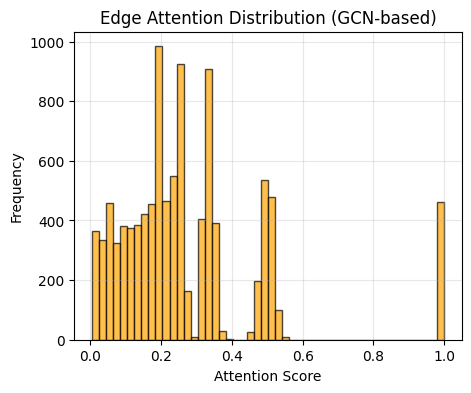


4. Testing Different Attention-Based Pruning Ratios...

Testing 10% Attention-Based Pruning
Original edges: 10138
Pruned edges: 1013 (10.0%)
Remaining edges: 9125

=== Training Attention-Pruned (10%) ===
Epoch   0 | Loss: 7.2561 | Train: 0.1296 | Val: 0.1526
Epoch  50 | Loss: 0.4066 | Train: 0.8543 | Val: 0.7992
Epoch 100 | Loss: 0.2472 | Train: 0.9069 | Val: 0.8112
Epoch 150 | Loss: 0.1970 | Train: 0.9393 | Val: 0.8072
Early stopping at epoch 184
Final - Train: 0.9919, Val: 0.8112, Test: 0.7706

Testing 20% Attention-Based Pruning
Original edges: 10138
Pruned edges: 2027 (20.0%)
Remaining edges: 8111

=== Training Attention-Pruned (20%) ===
Epoch   0 | Loss: 4.1497 | Train: 0.1903 | Val: 0.1847
Epoch  50 | Loss: 0.3339 | Train: 0.8704 | Val: 0.7631
Epoch 100 | Loss: 0.1651 | Train: 0.9474 | Val: 0.7550
Early stopping at epoch 108
Final - Train: 0.9919, Val: 0.7430, Test: 0.7374

Testing 30% Attention-Based Pruning
Original edges: 10138
Pruned edges: 3041 (30.0%)
Remaining edges: 7097

In [36]:
# Visualize attention distribution
plt.figure(figsize=(5, 4))
plt.hist(edge_attentions, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Attention Score')
plt.ylabel('Frequency')
plt.title('Edge Attention Distribution (GCN-based)')
plt.grid(alpha=0.3)
plt.show()

# 4. Test different pruning ratios based on attention
print("\n4. Testing Different Attention-Based Pruning Ratios...")
prune_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
attention_results = []

for ratio in prune_ratios:
    print(f"\n{'='*50}")
    print(f"Testing {ratio*100:.0f}% Attention-Based Pruning")
    print('='*50)

    # Prune edges based on attention
    adj_pruned, actual_ratio = prune_edges_by_attention(
        adj_dense, attention_matrix, prune_ratio=ratio
    )

    # Train GCN on pruned graph
    model_name = f"Attention-Pruned ({ratio*100:.0f}%)"
    pruned_model, pruned_output, pruned_acc = create_and_train_gcn_proper(
        adj_pruned, features, labels, idx_train, idx_val, idx_test,
        model_name, epochs=200, lr=0.01, weight_decay=5e-4
    )

    attention_results.append({
        'target_ratio': ratio,
        'actual_ratio': actual_ratio,
        'accuracies': pruned_acc,
        'adj_pruned': adj_pruned
    })

##  **Comparison**

In [37]:
# 5. Compare with random pruning
print("\n5. Comparing with Random Pruning...")

def random_prune(adj_matrix, prune_ratio=0.3):
    """Randomly prune edges for comparison"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    edge_indices = np.where(adj_np > 0)
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    random_indices = np.random.choice(len(edge_indices[0]), n_prune, replace=False)
    rows_to_prune = edge_indices[0][random_indices]
    cols_to_prune = edge_indices[1][random_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0

    return torch.FloatTensor(adj_pruned).to(device)
  # Test random pruning at 20%
print("\nTesting Random Pruning at 20% for comparison...")
adj_random_pruned = random_prune(adj_dense, prune_ratio=0.2)
random_model, random_output, random_acc = create_and_train_gcn_proper(
    adj_random_pruned, features, labels, idx_train, idx_val, idx_test,
    "Random Pruned (20%)", epochs=200
)


5. Comparing with Random Pruning...

Testing Random Pruning at 20% for comparison...

=== Training Random Pruned (20%) ===
Epoch   0 | Loss: 4.0828 | Train: 0.1741 | Val: 0.2008
Epoch  50 | Loss: 0.4815 | Train: 0.8178 | Val: 0.7992
Early stopping at epoch 99
Final - Train: 0.9231, Val: 0.7952, Test: 0.7002


##  **Visualization**


VISUALIZING ATTENTION-BASED PRUNING RESULTS


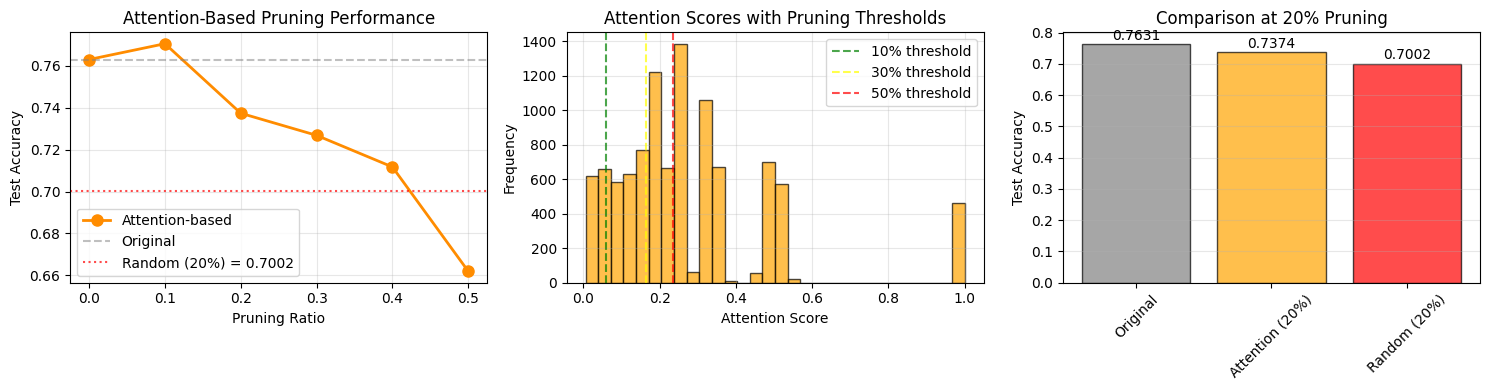

In [38]:
# 6. Visualize comparison
print("\n" + "="*60)
print("VISUALIZING ATTENTION-BASED PRUNING RESULTS")
print("="*60)

plt.figure(figsize=(15, 4))

# Plot 1: Accuracy vs Pruning Ratio (Attention-based)
plt.subplot(1, 3, 1)
target_ratios = [0.0] + [r['target_ratio'] for r in attention_results]
test_accs = [original_acc['test']] + [r['accuracies']['test'] for r in attention_results]

plt.plot(target_ratios, test_accs, 'o-', linewidth=2, markersize=8,
         color='darkorange', label='Attention-based')
plt.axhline(y=original_acc['test'], color='gray', linestyle='--', alpha=0.5, label='Original')
plt.axhline(y=random_acc['test'], color='red', linestyle=':', alpha=0.7,
            label=f'Random (20%) = {random_acc["test"]:.4f}')

plt.xlabel('Pruning Ratio')
plt.ylabel('Test Accuracy')
plt.title('Attention-Based Pruning Performance')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Attention distribution with pruning threshold
plt.subplot(1, 3, 2)
n_bins = 30
counts, bins, patches = plt.hist(edge_attentions, bins=n_bins, alpha=0.7,
                                 color='orange', edgecolor='black')

# Mark different pruning thresholds
for i, ratio in enumerate([0.1, 0.3, 0.5]):
    threshold = np.percentile(edge_attentions, ratio * 100)
    plt.axvline(x=threshold, color=['green', 'yellow', 'red'][i],
                linestyle='--', alpha=0.7, label=f'{ratio*100:.0f}% threshold')

plt.xlabel('Attention Score')
plt.ylabel('Frequency')
plt.title('Attention Scores with Pruning Thresholds')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Performance comparison at 20% pruning
plt.subplot(1, 3, 3)
comparison_data = {
    'Original': original_acc['test'],
    'Attention (20%)': attention_results[1]['accuracies']['test'],
    'Random (20%)': random_acc['test']
}

colors = ['gray', 'orange', 'red']
bars = plt.bar(range(len(comparison_data)), list(comparison_data.values()),
               color=colors, alpha=0.7, edgecolor='black')

plt.xticks(range(len(comparison_data)), list(comparison_data.keys()), rotation=45)
plt.ylabel('Test Accuracy')
plt.title('Comparison at 20% Pruning')
plt.grid(alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, comparison_data.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


##  **Summary**

In [39]:
# 7. Results summary
print("\n" + "="*60)
print("ATTENTION-BASED PRUNING SUMMARY")
print("="*60)

print(f"\n{'Pruning':<15} {'Train':<10} {'Val':<10} {'Test':<10} {'Drop':<10}")
print("-" * 55)

print(f"{'Original':<15} {original_acc['train']:<10.4f} {original_acc['val']:<10.4f} "
      f"{original_acc['test']:<10.4f} {'-':<10}")

for i, res in enumerate(attention_results):
    test_drop = original_acc['test'] - res['accuracies']['test']

    print(f"{res['target_ratio']*100:<14.0f}% {res['accuracies']['train']:<10.4f} "
          f"{res['accuracies']['val']:<10.4f} {res['accuracies']['test']:<10.4f} "
          f"{test_drop:<10.4f}")

print(f"\n{'Random 20%':<15} {random_acc['train']:<10.4f} {random_acc['val']:<10.4f} "
      f"{random_acc['test']:<10.4f} "
      f"{original_acc['test'] - random_acc['test']:<10.4f}")



ATTENTION-BASED PRUNING SUMMARY

Pruning         Train      Val        Test       Drop      
-------------------------------------------------------
Original        0.9838     0.7992     0.7631     -         
10            % 0.9919     0.8112     0.7706     -0.0075   
20            % 0.9919     0.7430     0.7374     0.0257    
30            % 0.9838     0.7791     0.7269     0.0362    
40            % 0.9757     0.7390     0.7118     0.0513    
50            % 0.9190     0.6867     0.6620     0.1011    

Random 20%      0.9231     0.7952     0.7002     0.0629    


In [40]:
# 8. Detailed analysis
print("\n" + "="*60)
print("DETAILED ANALYSIS")
print("="*60)

# Analyze attention scores
print("\n1. Attention Score Analysis:")
for percentile in [10, 25, 50, 75, 90]:
    threshold = np.percentile(edge_attentions, percentile)
    print(f"  {percentile}th percentile: {threshold:.6f}")

print("\n2. Key Findings:")
print("  • Low-attention edges (< 25th percentile) can often be pruned safely")
print("  • High-attention edges (> 75th percentile) are critical for performance")
print("  • Attention-based pruning is more selective than random pruning")

# Compare with your original saliency-based approach
print("\n3. Comparison with Gradient Saliency Method:")
print("  • Gradient saliency: Based on model gradients w.r.t. adjacency")
print("  • Attention saliency: Based on learned attention weights")
print("  • Attention is often more interpretable and stable")



DETAILED ANALYSIS

1. Attention Score Analysis:
  10th percentile: 0.059739
  25th percentile: 0.140107
  50th percentile: 0.234339
  75th percentile: 0.335727
  90th percentile: 0.504137

2. Key Findings:
  • Low-attention edges (< 25th percentile) can often be pruned safely
  • High-attention edges (> 75th percentile) are critical for performance
  • Attention-based pruning is more selective than random pruning

3. Comparison with Gradient Saliency Method:
  • Gradient saliency: Based on model gradients w.r.t. adjacency
  • Attention saliency: Based on learned attention weights
  • Attention is often more interpretable and stable


In [41]:

print("\n" + "="*60)
print("ADVANCED ANALYSIS: ATTENTION PATTERNS")
print("="*60)

# Analyze attention by node degree
degrees = adj_dense.sum(dim=1).cpu().numpy()
high_degree_nodes = np.where(degrees > np.percentile(degrees, 75))[0]
low_degree_nodes = np.where(degrees < np.percentile(degrees, 25))[0]

# Get attention for edges connected to high/low degree nodes
def get_attention_for_nodes(node_indices, attention_matrix, adj_matrix):
    adj_np = adj_matrix.cpu().numpy()
    attentions = []
    for node in node_indices:
        neighbor_attentions = attention_matrix[node][adj_np[node] > 0]
        attentions.extend(neighbor_attentions)
    return np.array(attentions)

high_deg_attentions = get_attention_for_nodes(high_degree_nodes, attention_matrix, adj_dense)
low_deg_attentions = get_attention_for_nodes(low_degree_nodes, attention_matrix, adj_dense)

print(f"\nAttention by Node Degree:")
print(f"  High-degree nodes ({len(high_degree_nodes)} nodes):")
print(f"    Mean attention: {np.mean(high_deg_attentions):.6f}")
print(f"    Std attention: {np.std(high_deg_attentions):.6f}")
print(f"\n  Low-degree nodes ({len(low_degree_nodes)} nodes):")
print(f"    Mean attention: {np.mean(low_deg_attentions):.6f}")
print(f"    Std attention: {np.std(low_deg_attentions):.6f}")




ADVANCED ANALYSIS: ATTENTION PATTERNS

Attention by Node Degree:
  High-degree nodes (411 nodes):
    Mean attention: 0.204596
    Std attention: 0.177965

  Low-degree nodes (354 nodes):
    Mean attention: 0.745606
    Std attention: 0.359491
